# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

# 2. Import Dataset

In [2]:
df = pd.read_csv('train_new.csv', index_col= 'Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotPorch,HouseRate_Cond_and_Material,Age_of_House
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,61,Above Average,5
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,0,Good,31
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,42,Above Average,7
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,307,Above Average,91
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,84,Good,8


In [3]:
pd.options.display.max_columns = 100
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotPorch,HouseRate_Cond_and_Material,Age_of_House
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,61,Above Average,5
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,Good,31
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,42,Above Average,7
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,307,Above Average,91
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,84,Good,8


In [4]:
df.shape

(1460, 75)

### Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSSubClass                   1460 non-null   int64  
 1   MSZoning                     1460 non-null   object 
 2   LotFrontage                  1201 non-null   float64
 3   LotArea                      1460 non-null   int64  
 4   Street                       1460 non-null   object 
 5   LotShape                     1460 non-null   object 
 6   LandContour                  1460 non-null   object 
 7   Utilities                    1460 non-null   object 
 8   LotConfig                    1460 non-null   object 
 9   LandSlope                    1460 non-null   object 
 10  Neighborhood                 1460 non-null   object 
 11  Condition1                   1460 non-null   object 
 12  Condition2                   1460 non-null   object 
 13  BldgType          

### Data Description

In [6]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotPorch,Age_of_House
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,0.613014,1.767123,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,87.084932,36.547945
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.644666,0.747315,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,105.190364,30.250152
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000,8.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,2.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,48.000000,35.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,136.000000,54.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,3.000000,4.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,1027.000000,136.000000


In [7]:
df.describe(include='O')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,HouseRate_Cond_and_Material
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,9,6,10
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal,Above Average
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,1267,1198,730


# Dataset Splitting

In [8]:
X = df.drop(columns="SalePrice")
y = df.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 74), (292, 74), (1168,), (292,))

### Selecting the columns as a numerical features

In [9]:
numeric_features = X_train.select_dtypes(include=[np.number])

In [10]:
numeric_features = list(numeric_features.drop(columns=['BsmtHalfBath','BsmtFullBath','Fireplaces','FullBath','HalfBath', 'GarageCars','KitchenAbvGr','OverallCond','OverallQual','BedroomAbvGr','KitchenAbvGr']))

###  Selecting the columns as a categorical features

In [11]:
categoric_features = X_train.select_dtypes(include = [np.object])

In [12]:
categoric_features

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,HouseRate_Cond_and_Material
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
255,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal,Above Average
1067,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,Good
639,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,Wd Sdng,None,TA,TA,CBlock,Fa,TA,No,Unf,Unf,GasA,Gd,Y,FuseA,TA,Typ,NaN,NaN,NaN,NaN,NaN,P,WD,Normal,Above Average
800,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,BrkTil,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Normal,Above Average
381,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Sdng,None,TA,TA,BrkTil,TA,TA,No,LwQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,Above Average
1131,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,WdShing,Plywood,None,TA,TA,BrkTil,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,Gd,Min2,TA,Detchd,Unf,TA,TA,Y,WD,Normal,Below Average
1295,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Hip,CompShg,WdShing,Plywood,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,WD,Normal,Above Average


In [13]:
categoric_features = list(categoric_features.drop(columns=['HouseRate_Cond_and_Material','KitchenQual','LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtExposure','BsmtQual','BsmtFinType1','Electrical','BsmtFinType2','HeatingQC','PavedDrive','GarageCond','GarageQual','GarageFinish','Functional','FireplaceQu','Neighborhood','Exterior1st','Exterior2nd','LandContour']))

### Selecting the type of categorical columns

In [14]:
categorical2 = list(X_train[['BsmtHalfBath','BsmtFullBath','Fireplaces','FullBath','HalfBath', 'GarageCars','OverallCond','OverallQual','BedroomAbvGr','KitchenAbvGr']])

In [15]:
Ordinal = list(X_train[['HouseRate_Cond_and_Material','KitchenQual','LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtExposure','BsmtQual','BsmtFinType1','Electrical','BsmtFinType2','HeatingQC','PavedDrive','GarageCond','GarageQual','GarageFinish','Functional','FireplaceQu','LandContour']])

In [16]:
Binary = list(X_train[['Neighborhood','Exterior1st','Exterior2nd']])

### Selecting encoder 

In [17]:
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from jcopml.tuning.space import Integer, Real

In [18]:
cat_pipe2 = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('OrdinalEncoder', ce.OrdinalEncoder())
])

In [19]:
cat_pipe3 = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('BinaryEncoder', ce.BinaryEncoder())
])

# Modeling

In [20]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [21]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), numeric_features),
    ('categoric', cat_pipe(encoder= 'onehot'), categoric_features),
    ('categoric2', cat_pipe(), categorical2),
    ('ordinal', cat_pipe2, Ordinal),
    ('binary', cat_pipe3, Binary),   
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


{'algo__alpha': 0.08326316547688103, 'algo__fit_intercept': False, 'algo__l1_ratio': 0.631138625997263}
0.8633654544823303 0.7985357552993575 0.8571179881386823


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512298840162.2704, tolerance: 4541836155.8029
  model = cd_fast.enet_coordinate_descent(


# Feature Importance

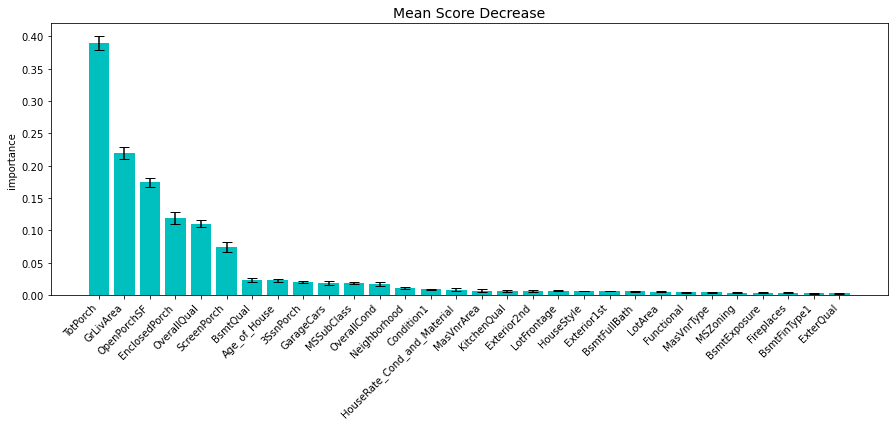

In [22]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=30)

In [23]:
numeric_imp = ['GrLivArea','LotArea','MSSubClass','EnclosedPorch','ScreenPorch','3SsnPorch','Age_of_House','OpenPorchSF',
               'LotFrontage','MasVnrArea','TotPorch']
categoric_imp = ['Condition1','MasVnrType','HouseStyle','MSZoning']
categoric_imp2 = ['OverallCond','OverallQual','Fireplaces','BsmtFullBath','GarageCars']
Ordinal_imp = ['BsmtExposure','HouseRate_Cond_and_Material','KitchenQual','BsmtQual','ExterQual','BsmtFinType1','Functional']
Binary_imp = ['Neighborhood','Exterior2nd','Exterior1st']

In [24]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), numeric_imp),
    ('categoric', cat_pipe(encoder= 'onehot'), categoric_imp),
    ('categoric2', cat_pipe(), categoric_imp2),
    ('ordinal', cat_pipe2, Ordinal_imp),
    ('binary', cat_pipe3, Binary_imp),   
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


{'algo__alpha': 0.061382260451644625, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.39850473439737355}
0.8501922114817866 0.8258707014613671 0.8551618473812427


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481018659638.547, tolerance: 696659484.3571944
  model = cd_fast.enet_coordinate_descent(


`So Feature Importance doesn't work to increase the test scores model. Thus, I still use all the columns`

# Polynomial Feature

In [25]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), numeric_features),
    ('categoric', cat_pipe(encoder= 'onehot'), categoric_features),
    ('categoric2', cat_pipe(), categorical2),
    ('ordinal', cat_pipe2, Ordinal),
    ('binary', cat_pipe3, Binary),   
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187488189187.04135, tolerance: 696659484.3571944
  model = cd_fast.enet_coordinate_descent(


{'algo__alpha': 0.00016430608316583367, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.15504161672774422}
0.9468826219119356 0.37763811002537634 0.8565683553696317


`Polynomial Feature just increase test scores slightly. But, I don't use it because it could make my computer run slower`

# Fine Tuning

In [26]:
from jcopml.tuning.space import Integer, Real

In [27]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), numeric_features),
    ('categoric', cat_pipe(encoder= 'onehot'), categoric_features),
    ('categoric2', cat_pipe(), categorical2),
    ('ordinal', cat_pipe2, Ordinal),
    ('binary', cat_pipe3, Binary),   
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


parameter = {'algo__fit_intercept': [True, False],
             'algo__alpha': Real(low=-4, high=2, prior='log-uniform'),
             'algo__l1_ratio': Real(low=0, high=1, prior='uniform')}


model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512298840162.2704, tolerance: 4541836155.8029
  model = cd_fast.enet_coordinate_descent(


{'algo__alpha': 0.08326316547688103, 'algo__fit_intercept': False, 'algo__l1_ratio': 0.631138625997263}
0.8633654544823303 0.7985357552993575 0.8571179881386823


# Evaluation

In [28]:
from jcopml.plot import plot_residual
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


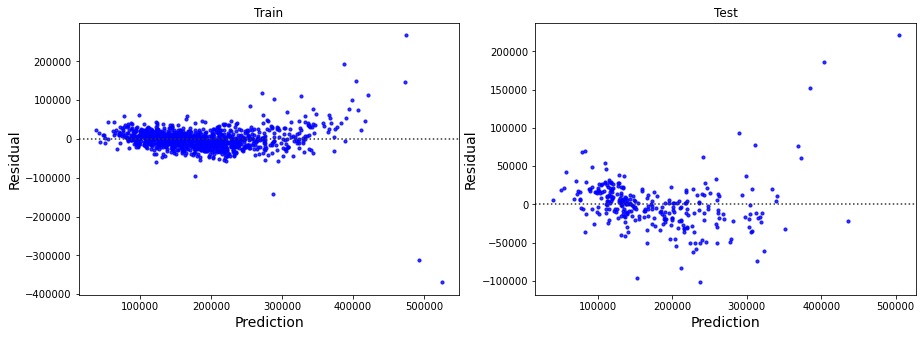

In [29]:
plot_residual(X_train, y_train, X_test, y_test, model)

In [30]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error', ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotPorch,HouseRate_Cond_and_Material,Age_of_House,pred,actual,error
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,1872,0,4316,0,1,3,1,4,1,Ex,Typ,2,Ex,Attchd,Fin,3,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,50,Very Good,13,503716.826044,755000,251283.173956
899,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,0,0,2364,1,0,2,1,2,1,Ex,Typ,2,Gd,Attchd,Fin,3,TA,TA,Y,0,67,0,0,0,0,0,3,2010,New,Partial,67,Good,1,403540.547898,611657,208116.452102
1047,60,RL,85.0,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240,Unf,0,1752,1992,GasA,Ex,Y,SBrkr,876,0,2868,0,0,3,1,4,1,Ex,Typ,1,Gd,BuiltIn,Fin,3,TA,TA,Y,214,108,0,0,0,0,0,7,2006,New,Partial,108,Good,1,384619.954121,556581,171961.045879
775,20,RL,110.0,14226,Pave,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,375.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1935,1935,GasA,Gd,Y,SBrkr,0,0,1973,0,0,2,0,3,1,Gd,Typ,1,Gd,Attchd,Fin,3,TA,TA,Y,315,45,0,0,0,0,0,7,2007,New,Partial,45,Good,1,290209.993553,395000,104790.006447
813,20,C (all),66.0,8712,Grvl,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,5,5,1952,1952,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,540,540,GasA,TA,N,FuseA,0,0,1044,0,0,1,0,2,1,Fa,Typ,0,NaN,Basment,Unf,2,TA,TA,N,0,0,0,0,0,0,54,6,2010,WD,Alloca,0,Average,58,152530.822749,55993,96537.822749
1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,0,0,2076,1,0,2,1,2,1,Ex,Typ,1,Gd,Attchd,Fin,3,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,Partial,229,Very Good,0,369335.065417,465000,95664.934583
589,20,RL,65.0,25095,Pave,IR1,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,5,8,1968,2003,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Gd,GLQ,1324,Unf,0,113,1437,GasA,Ex,Y,SBrkr,0,0,1473,2,0,1,0,1,1,Ex,Typ,2,Gd,Attchd,Unf,1,TA,TA,Y,0,48,0,0,60,0,0,6,2009,WD,Partial,108,Good,41,237712.250683,143000,94712.250683
232,60,RL,174.0,15138,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1995,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,506.0,Gd,TA,PConc,Gd,TA,No,GLQ,689,Unf,0,773,1462,GasA,Ex,Y,SBrkr,1304,0,2794,1,0,2,1,4,1,Ex,Typ,1,TA,Attchd,Fin,3,TA,TA,Y,0,146,202,0,0,0,0,7,2009,WD,Normal,348,Good,14,311686.072456,403000,91313.927544
592,60,RL,97.0,13478,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2008,2008,Gable,CompShg,CemntBd,CmentBd,Stone,420.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1338,Unf,0,384,1722,GasA,Ex,Y,SBrkr,568,0,2296,1,0,2,1,3,1,Ex,Typ,1,Gd,BuiltIn,RFn,3,TA,TA,Y,382,274,0,0,0,0,0,6,2009,ConLI,Normal,274,Very Good,1,372734.441737,451950,79215.558263


# Summary Result

In [31]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('R2 Train :', r2_score(y_train, y_pred_train))
print('R2 Test :', r2_score(y_test, y_pred_test))
print('MAE Train :', mean_absolute_error(y_train, y_pred_train))
print('MAE Test :', mean_absolute_error(y_test, y_pred_test))
print('MSE Train :', mean_squared_error(y_train, y_pred_train))
print('MSE Test :', mean_squared_error(y_test, y_pred_test))
print('RMSE Train :', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE Test :', mean_squared_error(y_test, y_pred_test, squared=False))

R2 Train : 0.8633654544823303
R2 Test : 0.8571179881386823
MAE Train : 17368.019275207833
MAE Test : 19900.086433989265
MSE Train : 814963630.3571868
MSE Test : 1095951640.1154866
RMSE Train : 28547.567853622604
RMSE Test : 33105.160324570046


# Save the Model

In [32]:
save_model(model.best_estimator_, "Ames_House_Prediction_ElasticNet.pkl")

Model is pickled as model/Ames_House_Prediction_ElasticNet.pkl
